# Figure 7 C & D

In [1]:
from FileToDFTools import read_tail_files, create_tail_dataframe
import pandas as pd
from CrossCorr.Const import SWIM_MODE_COLOR
import seaborn as sns
sns.set_theme(font_scale=1.5)
sns.set_style(style="white")


In [6]:
#slow to intermediate comparison is done with one simulation with both modes triggered
freq_files, move_files = read_tail_files("10 Somite S-I")

group1 = 'Slow'
group2 = 'Intermediate'
group1_color = SWIM_MODE_COLOR[1]
group2_color = SWIM_MODE_COLOR[3]
time_lim = 1850

# Combine all files
freq_data = create_tail_dataframe(freq_files, group1, 'Rolling TBF')
move_data = create_tail_dataframe(move_files, group1, 'Y-Axis')
move_data['Time'] = pd.to_numeric(move_data["Time"], errors='coerce')

freq_data.loc[freq_data["Time"]>time_lim,"Group"] = group2
move_data.loc[move_data["Time"]>time_lim,"Group"] = group2

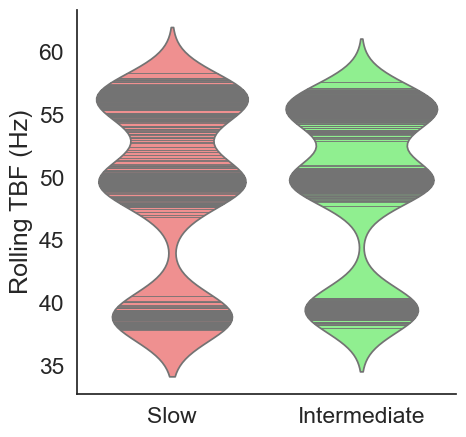

In [7]:
g = sns.catplot(data=freq_data, x="Group", y="Rolling TBF", kind="violin", inner="stick", hue="Group",
                palette={group1: group1_color, group2: group2_color}, legend=False )
g.set(xlabel=None, ylabel="Rolling TBF (Hz)")


In [8]:
from scipy.stats import mannwhitneyu

first_freq_data = freq_data.loc[freq_data["Group"]==group1]
second_freq_data = freq_data.loc[freq_data["Group"]==group2]
u_stat, p_val = mannwhitneyu(first_freq_data["Rolling TBF"], second_freq_data["Rolling TBF"])
print(group1, ": ", first_freq_data.shape[0])
print(group2, ": ", second_freq_data.shape[0])
print(p_val)

Slow :  732
Intermediate :  744
0.9774424497060726


In [9]:
import numpy as np
from scipy.signal import find_peaks

distances = move_data[move_data["Time"]<time_lim] ["Y-Axis"]
# Find peaks
peaks, _ = find_peaks(distances)
# Extract peak values
peak_values_1 = np.abs(np.array(distances)[peaks])
peak_values_1 = peak_values_1[(peak_values_1 > 0.001)]
df1 = pd.DataFrame({"Y-Axis":peak_values_1})
df1['Group'] = group1


distances = move_data[move_data["Time"]>time_lim] ["Y-Axis"]
# Find peaks
peaks, _ = find_peaks(distances)
peak_values_2 = np.abs(np.array(distances)[peaks])
peak_values_2 = peak_values_2[(peak_values_2 > 0.01)]
df2 = pd.DataFrame({"Y-Axis":peak_values_2})
df2['Group'] = group2
peak_data = pd.concat([df1, df2])


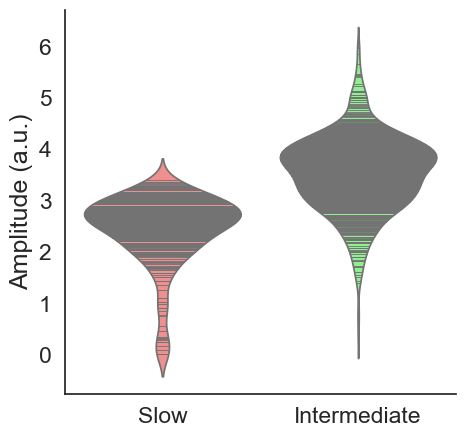

In [10]:
g = sns.catplot(data=peak_data, x="Group", y="Y-Axis", kind="violin", inner="stick", hue="Group",
                palette={group1: group1_color, group2: group2_color}, legend=False )
g.set(xlabel=None, ylabel="Amplitude (a.u.)")


In [11]:
from scipy.stats import mannwhitneyu


u_stat, p_val = mannwhitneyu(peak_values_1, peak_values_2)
print(group1, ": ", peak_data[peak_data['Group'] == group1].shape[0])
print(group2, ": ", peak_data[peak_data['Group'] == group2].shape[0])
print(p_val)

Slow :  400
Intermediate :  832
3.2063625929422805e-105
